<a href="https://colab.research.google.com/github/iamkishan98/Deep-learning-assignments/blob/master/raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/Deep Learning Course 2020/classification data/')
print(os.getcwd())

/content/drive/My Drive/Deep Learning Course 2020/classification data


In [3]:
#Loading Training data
import numpy as np
from sklearn.model_selection import train_test_split
raw_xtrain = np.load("Raw_PCB/s_x_train.npy")
print(raw_xtrain.shape)


(2669, 300, 300, 3)


In [5]:
raw_ytrain = np.load("Raw_PCB/s_y_train.npy")
print(raw_ytrain.shape)

(2669,)


Using TensorFlow backend.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


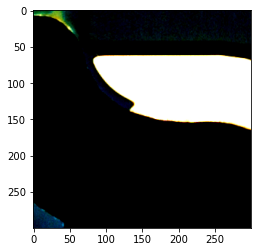

In [6]:
import matplotlib.pyplot as plt
import keras
%matplotlib inline


mean = np.mean(raw_xtrain)
std =  np.std(raw_xtrain)

raw_xtrain = raw_xtrain - mean
raw_xtrain = raw_xtrain/std

plt.imshow(raw_xtrain[149] , cmap='gray')



In [7]:
from keras.utils import to_categorical
raw_ytrain = to_categorical(raw_ytrain)
print(raw_ytrain[149])

[0. 1.]


In [0]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import metrics
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
#Splitting the data into training and test data
X_train , X_test ,y_train ,y_test =train_test_split(raw_xtrain,raw_ytrain,test_size=0.2)

In [14]:
print("Training Data : ",X_train)
print("Test Data : ",X_test)
print("Training Labels : ",y_train)
print("Testing Labels : ",y_test)

Training Data :  [[[[ 2.98367032e+00  2.33469903e+00  1.09238257e+00]
   [ 2.92804421e+00  2.29761496e+00  1.03675646e+00]
   [ 3.07638050e+00  2.39032514e+00  1.14800868e+00]
   ...
   [ 3.18763272e+00  2.39032514e+00  1.16655072e+00]
   [ 3.28034291e+00  2.46449329e+00  1.24071886e+00]
   [ 3.31742698e+00  2.50157736e+00  1.27780294e+00]]

  [[ 3.07638050e+00  2.37178310e+00  1.16655072e+00]
   [ 3.09492254e+00  2.40886718e+00  1.18509275e+00]
   [ 3.24325883e+00  2.46449329e+00  1.22217683e+00]
   ...
   [ 3.16909069e+00  2.37178310e+00  1.14800868e+00]
   [ 3.22471680e+00  2.40886718e+00  1.14800868e+00]
   [ 3.24325883e+00  2.40886718e+00  1.16655072e+00]]

  [[ 3.20617476e+00  2.46449329e+00  1.27780294e+00]
   [ 3.20617476e+00  2.52011940e+00  1.29634497e+00]
   [ 3.29888494e+00  2.52011940e+00  1.25926090e+00]
   ...
   [ 3.33596902e+00  2.53866144e+00  1.25926090e+00]
   [ 3.28034291e+00  2.52011940e+00  1.20363479e+00]
   [ 3.20617476e+00  2.48303533e+00  1.12946664e+00]]

  

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(16, (5,5), input_shape=(300,300,3), activation='relu', strides=(2,2), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 16)      1216      
_________________________________________________________________
average_pooling2d_2 (Average (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 70, 70, 16)        6416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 35, 35, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 19600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               2352120   
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [16]:
#model.compile(optimizer=keras.optimizers.SGD(),  # Optimizer
              # Loss function to minimize
              #loss ='mean_squared_error',
 #             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # List of metrics to monitor
  #            metrics=['sparse_categorical_accuracy'])
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

history=model.fit(X_train,y_train, batch_size=256 , epochs=20 , verbose=1)

Epoch 1/20
9/9 [==============================] - 23s 3s/step - loss: 0.3028 - accuracy: 0.8384
Epoch 2/20
9/9 [==============================] - 23s 3s/step - loss: 0.2095 - accuracy: 0.9415
Epoch 3/20
9/9 [==============================] - 22s 2s/step - loss: 0.1990 - accuracy: 0.9415
Epoch 4/20
9/9 [==============================] - 23s 3s/step - loss: 0.1983 - accuracy: 0.9415
Epoch 5/20
9/9 [==============================] - 22s 2s/step - loss: 0.1983 - accuracy: 0.9415
Epoch 6/20
9/9 [==============================] - 22s 2s/step - loss: 0.1981 - accuracy: 0.9415
Epoch 7/20
9/9 [==============================] - 22s 2s/step - loss: 0.1811 - accuracy: 0.9415
Epoch 8/20
9/9 [==============================] - 22s 2s/step - loss: 0.1687 - accuracy: 0.9415
Epoch 9/20
9/9 [==============================] - 22s 2s/step - loss: 0.1597 - accuracy: 0.9415
Epoch 10/20
9/9 [==============================] - 22s 2s/step - loss: 0.1558 - accuracy: 0.9415
Epoch 11/20
9/9 [======================

In [0]:
#Loading Testing dataset
#xtest = np.load("Aug_PCB/s_x_train.npy")
#ytest = np.load("Aug_PCB/s_y_train.npy")
#print(xtest)
#print(xtest.shape)
#print(ytest)
#print(ytest.shape)

[[[[0.07058824 0.11764706 0.14509805]
   [0.05882353 0.10980392 0.13725491]
   [0.05882353 0.10588235 0.13725491]
   ...
   [0.05490196 0.10588235 0.13333334]
   [0.05882353 0.11764706 0.13725491]
   [0.08235294 0.14509805 0.16078432]]

  [[0.07450981 0.11764706 0.14901961]
   [0.07058824 0.11372549 0.14509805]
   [0.07450981 0.11764706 0.15294118]
   ...
   [0.05882353 0.10588235 0.13333334]
   [0.0627451  0.11372549 0.14117648]
   [0.08627451 0.14117648 0.16078432]]

  [[0.07843138 0.11764706 0.15294118]
   [0.07450981 0.11764706 0.15294118]
   [0.06666667 0.12156863 0.15686275]
   ...
   [0.05882353 0.10588235 0.12941177]
   [0.0627451  0.10588235 0.13333334]
   [0.09411765 0.14509805 0.16862746]]

  ...

  [[0.12156863 0.22352941 0.23137255]
   [0.12156863 0.22352941 0.22745098]
   [0.13725491 0.22352941 0.22352941]
   ...
   [0.06666667 0.11764706 0.14901961]
   [0.05882353 0.10980392 0.13725491]
   [0.05882353 0.10980392 0.13333334]]

  [[0.12156863 0.22352941 0.22745098]
   [0.1

In [0]:
xtest = xtest.astype('float32')
xtest -=mean
xtest /=std



In [0]:
ytest = to_categorical(ytest)

In [17]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print("Test loss : ",test_loss)
print("Test_Accuracy : ",test_acc)

17/17 [==============================] - 2s 106ms/step - loss: 0.1639 - accuracy: 0.9494
Test loss :  0.1638837307691574
Test_Accuracy :  0.949438214302063


In [18]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
target_names = ['class 0','class 1']
print(classification_report(np.argmax(y_test,axis=1) , y_pred , target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.20      0.04      0.07        24
     class 1       0.96      0.99      0.97       510

    accuracy                           0.95       534
   macro avg       0.58      0.52      0.52       534
weighted avg       0.92      0.95      0.93       534

